# HW8 - Neuronal Dynamics (Oscillating Systems)

This week we learned about the FitzHugh Nagumo model of a neuron described by the following equations:

$$\dot{v} = -v(v-a)(v-1)-w $$
$$\dot{w} = \epsilon (v - \gamma w)$$

## Question 1

Solve for the v and w nullclines, define them as functions, and plot them for $\gamma = 2$ and $\gamma = 8$. Use $\epsilon = 0.01$ and $a = 0.1$. Make sure that the X and Y limits of your plots show all relavant dynamics.


<Figure size 640x480 with 0 Axes>

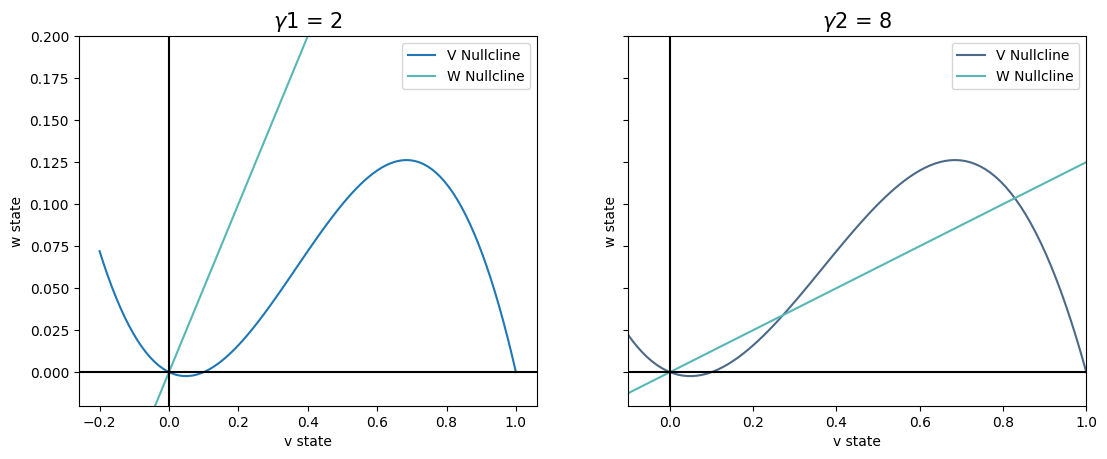

In [89]:
import matplotlib.pyplot as plt
import numpy as np

def v_nullcline(v, a_null):
    w = -v * (v - a_null) * (v - 1)
    return w

def w_nullcline(w, gamma_null):
    v = gamma_null * w
    return v

gamma1, gamma2 = 2, 8
eps = 0.01
a = 0.1

v = np.linspace(-0.2, 1, 100)
w = np.linspace(-0.1, 0.3, 100)

plt.figure()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True)
fig.set_figwidth(13)

ax1.plot(v, v_nullcline(v, a), label = 'V Nullcline')
ax1.plot(w_nullcline(w, gamma1), w, color = '#57b7b4', label = 'W Nullcline')
ax1.axhline(0, color='black')
ax1.axvline(0, color='black')
ax1.set_title(r'$\gamma$1 = 2', fontsize = 15)
ax1.set_xlabel('v state')
ax1.set_ylabel('w state')
ax1.legend(loc = 'upper right')

ax2.plot(v, v_nullcline(v, a), color = '#4c6a87', label = 'V Nullcline')
ax2.plot(w_nullcline(w, gamma2), w, color = '#57b7b4', label = 'W Nullcline')
ax2.axhline(0, color='black')
ax2.axvline(0, color='black')
ax2.set_title(r'$\gamma$2 = 8', fontsize = 15)
ax2.set_xlabel('v state')
ax2.set_ylabel('w state')
ax2.legend(loc = 'upper right')

plt.xlim(-0.1, 1)
plt.ylim(-0.02, 0.2)
plt.show()


## Question 2

Plot the phase portraits for both of the $\gamma$ parameter values. 
How has the phase flow changed by changing $\gamma$? What happens to the set of possible state trajectories when $\gamma$ becomes large?


<Figure size 640x480 with 0 Axes>

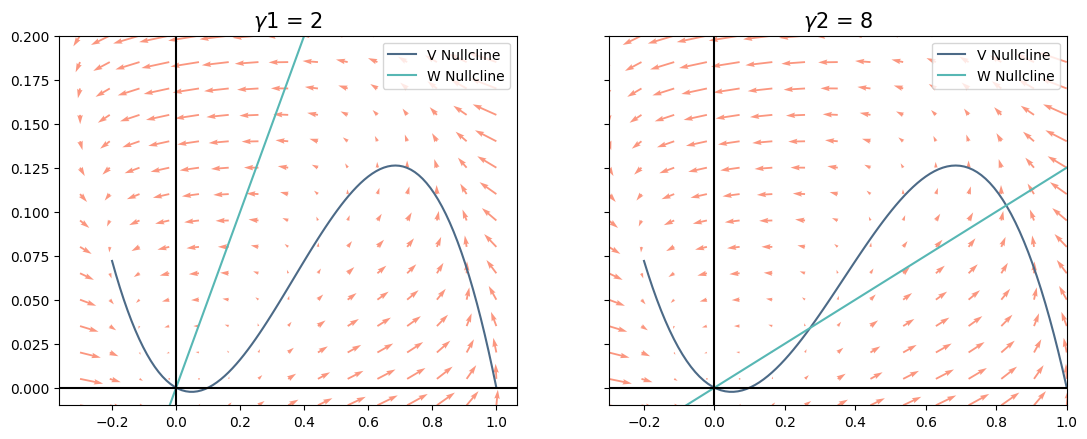

In [77]:

def fitzHughNagumo(state, t, a, eps, gamma):
    
    v = state[0]
    w = state[1]

    dv = -v * (v - a) * (v - 1) - w
    dw = eps * (v - gamma1 * w)

    return(dv, dw)

xlim = [-.3, 1]
ylim = [-.01, .2]

npoints = 15

s1 = np.linspace(xlim[0], xlim[1], npoints)
s2 = np.linspace(ylim[0], ylim[1], npoints)

S1, S2 = np.meshgrid(s1, s2)

q1, p1 = np.zeros(S1.shape), np.zeros(S2.shape)
q2, p2 = np.zeros(S1.shape), np.zeros(S2.shape)

NI, NJ = S1.shape

# plotting phase diagrams
for i in range(NI):
    for j in range(NJ):
        x = S1[i, j]
        y = S2[i, j]

        S_dot1 = fitzHughNagumo([x, y], [], a, eps, gamma1)
        S_dot2 = fitzHughNagumo([x, y], [], a, eps, gamma2)

        p1[i, j] = S_dot1[0]
        q1[i, j] = S_dot1[1]/.1
        p2[i, j] = S_dot2[0]
        q2[i, j] = S_dot2[1]/.1

plt.figure()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True)
fig.set_figwidth(13)

ax1.quiver(S1, S2, p1, q1, scale = 3, color = '#fb967f')
ax1.plot(v, v_nullcline(v, a), color = '#4c6a87', label = 'V Nullcline')
ax1.plot(w_nullcline(w, gamma1), w, color = '#57b7b4', label = 'W Nullcline')
ax1.axhline(0, color='black')
ax1.axvline(0, color='black')
ax1.set_title(r'$\gamma$1 = 2', fontsize = 15)
ax1.legend(loc = 'upper right')

ax2.quiver(S1, S2, p2, q2, scale = 3, color = '#fb967f')
ax2.plot(v, v_nullcline(v, a), color = '#4c6a87', label = 'V Nullcline')
ax2.plot(w_nullcline(w, gamma2), w, color = '#57b7b4', label = 'W Nullcline')
ax2.axhline(0, color='black')
ax2.axvline(0, color='black')
ax2.set_title(r'$\gamma$2 = 8', fontsize = 15)
ax2.legend(loc = 'upper right')

plt.ylim(ylim[0], ylim[1])
plt.xlim(xlim[0], xlim[1])
plt.show()


## Question 3
Numerically integrate the FH equations with the addition of a step impulse.

To add a step impulse to this simulation consider that an outside change in the current $I(t)$ that effect the $\dot{v}$ so that

$$\dot{v} = -v(v-a)(v-1)-w + I(t)$$
$$\dot{w} = \epsilon (v - \gamma w)$$


* Define a new function of the FN equations with a forcing function `input(Ton,q)` where $I(t) = 0$ until `Ton` whereafter $I(t) = q$
* Simulate a sudden increase in I. Plot $v(t)$ and $w(t)$. What happens to the neuron?
* Determine the minimum value of $I$ that causes full spiking to 1 significant digit by trying different input amplitudes. 
* What is the lowest step current amplitude to 1 sig fig to generate **repetitive firing**?

## Question 4 - EXTRA CREDIT (not optional for grads)

Below is a more realistic simulation of a neuron from the famous Hodgkin and Huxley model. While it is more accurate it is less mathematically tractable and thus requires more simulation to get intuition. I have implemented the model with real parameters, ie. they represent real concentrations and voltages.

Here we will use a dictionary to store and alter parameter values. This maintains readability in a rather unwieldy model. Use the following line of code to change the injected voltage:
`params['E_params']['I_ext'] = 1.0e-11`

1) Simulate the neuron so that it only has leakage current and external current. In other words, comment out the terms for sodium and potassium channels. Run a simulation with an initial membrane potential of -70mv and an external current of 0mv. What happens and why?

2) Change the external current to 1e-10 and re-run the simulation. What happens and why?

3) Add back the sodium channel terms (activation and deactivation). Run a simulation with external current 1e-10 and initial states `[-70e-03, 0, 1]`. What happens and why?

4) Add back terms related to the potassium channel. Run a simulation with external current 1e-10 and initial states `[-70e-03, 0, 1, 0]`. What happens and why?

5) What is the effect of external current on neuronal firing behavior? What voltages cause full firing, and repetitive firing. Is there a minimum voltage? Plot the membrane voltage as a function of time to show that this is true. 

In [3]:
# set up a dictionary of parameters so that we can index by name

import numpy as np
from scipy.integrate import odeint
import scipy as sp
import matplotlib.pyplot as plt
import math as m



E_params = {
        'E_leak' : -7.0e-2,
        'G_leak' : 3.0e-09,
        'C_m'    : 3.0e-11,
        'I_ext'  : 1.0e-2
}

Na_params = {
        'Na_E'          : 5.0e-2,
        'Na_G'          : 1.0e-6,
        'k_Na_act'      : 3.0e+0,
        'A_alpha_m_act' : 2.0e+5,
        'B_alpha_m_act' : -4.0e-2,
        'C_alpha_m_act' : 1.0e-3,
        'A_beta_m_act'  : 6.0e+4,
        'B_beta_m_act'  : -4.9e-2,
        'C_beta_m_act'  : 2.0e-2,
        'l_Na_inact'    : 1.0e+0,
        'A_alpha_m_inact' : 8.0e+4,
        'B_alpha_m_inact' : -4.0e-2,
        'C_alpha_m_inact' : 1.0e-3,
        'A_beta_m_inact'  : 4.0e+2,
        'B_beta_m_inact'  : -3.6e-2,
        'C_beta_m_inact'  : 2.0e-3
}

K_params = {
        'k_E'           : -9.0e-2,
        'k_G'           : 2.0e-7,
        'k_K'           : 4.0e+0,
        'A_alpha_m_act' : 2.0e+4,
        'B_alpha_m_act' : -3.1e-2,
        'C_alpha_m_act' : 8.0e-4,
        'A_beta_m_act'  : 5.0e+3,
        'B_beta_m_act'  : -2.8e-2,
        'C_beta_m_act'  : 4.0e-4
}

params = {
        'E_params'  : E_params,
        'Na_params' : Na_params,
        'K_params'  : K_params
}

#Example of how to index the dicts
print(E_params['E_leak'])
print(K_params['k_K'])


def neuron(state, t, params):
        """
         Purpose: simulate Hodgkin and Huxley model for the action potential using
         the equations from Ekeberg et al, Biol Cyb, 1991.
         Input: state ([E m h n] (ie [membrane potential; activation of
                  Na++ channel; inactivation of Na++ channel; activation of K+
                  channel]),
                t (time),
                and the params (parameters of neuron; see Ekeberg et al).
         Output: statep (state derivatives).
        """

        E = state[0]
        m = state[1]
        h = state[2]
        n = state[3]

        Epar = params['E_params']
        Na   = params['Na_params']
        K    = params['K_params']

        # external current (from "voltage clamp", other compartments, other neurons, etc)
        I_ext = Epar['I_ext']

        # calculate Na rate functions and I_Na
        alpha_act = Na['A_alpha_m_act'] * (E-Na['B_alpha_m_act']) / (1.0 - np.exp((Na['B_alpha_m_act']-E) / Na['C_alpha_m_act']))
        beta_act = Na['A_beta_m_act'] * (Na['B_beta_m_act']-E) / (1.0 - np.exp((E-Na['B_beta_m_act']) / Na['C_beta_m_act']) )
        dmdt = ( alpha_act * (1.0 - m) ) - ( beta_act * m )

        alpha_inact = Na['A_alpha_m_inact'] * (Na['B_alpha_m_inact']-E) / (1.0 - np.exp((E-Na['B_alpha_m_inact']) / Na['C_alpha_m_inact']))
        beta_inact  = Na['A_beta_m_inact'] / (1.0 + (np.exp((Na['B_beta_m_inact']-E) / Na['C_beta_m_inact'])))
        dhdt = ( alpha_inact*(1.0 - h) ) - ( beta_inact*h )

        # Na-current:
        I_Na =(Na['Na_E']-E) * Na['Na_G'] * (m**Na['k_Na_act']) * h

        # calculate K rate functions and I_K
        alpha_kal = K['A_alpha_m_act'] * (E-K['B_alpha_m_act']) / (1.0 - np.exp((K['B_alpha_m_act']-E) / K['C_alpha_m_act']))
        beta_kal = K['A_beta_m_act'] * (K['B_beta_m_act']-E) / (1.0 - np.exp((E-K['B_beta_m_act']) / K['C_beta_m_act']))
        dndt = ( alpha_kal*(1.0 - n) ) - ( beta_kal*n )
        I_K = (K['k_E']-E) * K['k_G'] * n**K['k_K']

        # leak current
        I_leak = (Epar['E_leak']-E) * Epar['G_leak']

        # calculate derivative of E
        dEdt = (I_leak + I_K + I_Na + I_ext) / Epar['C_m']
        statep = [dEdt, dmdt, dhdt, dndt]

        return statep

-0.07
4.0


In [14]:

# set initial states and time vector
state0 = [-70e-03, 0, 1, 0]
t = np.arange(0, 0.2, 0.001)

# let's inject some external current
#params['E_params']['I_ext'] = #Enter parameter value here

# run simulation
state = odeint(neuron, state0, t, args=(params,))

#### Who did you work with?
